# Connecting to prepared datasets!

### step 1: update your local copy of the data

Set up rclone as described in README.md

In [1]:
# make directory if it doesn't exist
!mkdir -p ../data/Measurements

# only sync down the prepared datasets folder
!rclone sync vfa-Measurements:/prepared-datasets ../data/Measurements/prepared-datasets

### step 2: 
Make sure you've created a conda environment with the necessary packages (`vfa-01`).
At least `pandas` and `pyarrow` are required.

In [1]:
# option 1: just use pandas
# note: pyarrow introduces schema mismatches that it can't resolve, so choose a batch manually

import pandas as pd
pd.set_option('display.max_rows', 10)

df_sensor_data = pd.read_parquet("../data/Measurements/prepared-datasets/sensor_data_parquet/BATCH=2018-10-16/")
df_sensor_data

,Date,Time,Air temp,Humidity,Water level,Water temp,EC,pH,CO2,DO,FILENAME,Time (raw),DT,FILE_TIMESTAMP,PATTERN_NAME,RACK
0,2017-12-21,16:13:31,20.18,31.92,19.0,17.81,0.99,6.05,NaN,NaN,byspireMonitoring21_12-1613.csv,16:13:31,2017-12-21 16:13:31,2018-12-21 16:13:00,2,None
1,2017-12-21,16:13:37,19.96,33.67,19.0,17.94,0.95,6.03,NaN,NaN,byspireMonitoring21_12-1613.csv,16:13:37,2017-12-21 16:13:37,2018-12-21 16:13:00,2,None
2,2017-12-21,16:14:20,19.94,33.52,42.0,17.94,0.99,6.10,NaN,NaN,byspireMonitoring21_12-1613.csv,16:14:20,2017-12-21 16:14:20,2018-12-21 16:13:00,2,None
3,2017-12-21,16:15:20,19.93,33.37,67.0,17.94,0.99,6.10,NaN,NaN,byspireMonitoring21_12-1613.csv,16:15:20,2017-12-21 16:15:20,2018-12-21 16:13:00,2,None
4,2017-12-21,16:16:20,19.93,35.50,25.0,17.94,0.99,6.04,NaN,NaN,byspireMonitoring21_12-1613.csv,16:16:20,2017-12-21 16:16:20,2018-12-21 16:13:00,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355844,2018-09-20,19:55:10,19.70,50.80,49.0,19.30,1.90,6.30,789.0,2.7,Rack_4_20_09_1951.csv,19:55:10,2018-09-20 19:55:10,2018-09-20 19:51:00,1,4
355845,2018-09-20,19:56:10,19.70,51.00,49.0,19.30,1.90,6.30,810.0,2.7,Rack_4_20_09_1951.csv,19:56:10,2018-09-20 19:56:10,2018-09-20 19:51:00,1,4
355846,2018-09-20,19:57:10,19.70,51.10,49.0,19.30,1.90,6.30,792.0,2.5,Rack_4_20_09_1951.csv,19:57:10,2018-09-20 19:57:10,2018-09-20 19:51:00,1,4
355847,2018-09-20,19:58:10,19.60,51.20,49.0,19.20,1.90,6.30,730.0,2.5,Rack_4_20_09_1951.csv,19:58:10,2018-09-20 19:58:10,2018-09-20 19:51:00,1,4


In [2]:
# option 2: can take advantage of pyarrow and parquet
# note: pyarrow introduces schema mismatches that it can't resolve, so choose a batch manually
import pyarrow.parquet as pq
tab_sensor_data = pq.read_pandas("../data/Measurements/prepared-datasets/sensor_data_parquet/BATCH=2018-10-16/")
tab_sensor_data

pyarrow.Table
Date: timestamp[ms]
Time: time64[us]
Air temp: double
Humidity: double
Water level: double
Water temp: double
EC: double
pH: double
CO2: double
DO: double
FILENAME: string
Time (raw): string
DT: timestamp[ms]
FILE_TIMESTAMP: timestamp[ms]
PATTERN_NAME: string
RACK: string
__index_level_0__: int64
metadata
--------
{b'pandas': b'{"column_indexes": [{"pandas_type": "unicode", "name": null, "nu'
            b'mpy_type": "object", "metadata": {"encoding": "UTF-8"}, "field_n'
            b'ame": null}], "columns": [{"pandas_type": "datetime", "name": "D'
            b'ate", "numpy_type": "datetime64[ns]", "metadata": null, "field_n'
            b'ame": "Date"}, {"pandas_type": "time", "name": "Time", "numpy_ty'
            b'pe": "object", "metadata": null, "field_name": "Time"}, {"pandas'
            b'_type": "float64", "name": "Air temp", "numpy_type": "float64", '
            b'"metadata": null, "field_name": "Air temp"}, {"pandas_type": "fl'
            b'oat64", "name": 

### Choosing a `BATCH`
The batch partition column version controls the dataset.


In [3]:
# Option 1: Just use the path
df_sensor_data = pd.read_parquet(
    "../data/Measurements/prepared-datasets/sensor_data_parquet/BATCH=2018-10-02/",
)
df_sensor_data

,Date,Time,Air temp,Humidity,Water level,Water temp,EC,pH,CO2,DO,FILENAME,Time (raw),DT,FILE_TIMESTAMP,PATTERN_NAME,RACK
0,2017-12-21,16:13:31,20.18,31.92,19.0,17.81,0.99,6.05,NaN,NaN,byspireMonitoring21_12-1613.csv,16:13:31,2017-12-21 16:13:31,2018-12-21 16:13:00,2,None
1,2017-12-21,16:13:37,19.96,33.67,19.0,17.94,0.95,6.03,NaN,NaN,byspireMonitoring21_12-1613.csv,16:13:37,2017-12-21 16:13:37,2018-12-21 16:13:00,2,None
2,2017-12-21,16:14:20,19.94,33.52,42.0,17.94,0.99,6.10,NaN,NaN,byspireMonitoring21_12-1613.csv,16:14:20,2017-12-21 16:14:20,2018-12-21 16:13:00,2,None
3,2017-12-21,16:15:20,19.93,33.37,67.0,17.94,0.99,6.10,NaN,NaN,byspireMonitoring21_12-1613.csv,16:15:20,2017-12-21 16:15:20,2018-12-21 16:13:00,2,None
4,2017-12-21,16:16:20,19.93,35.50,25.0,17.94,0.99,6.04,NaN,NaN,byspireMonitoring21_12-1613.csv,16:16:20,2017-12-21 16:16:20,2018-12-21 16:13:00,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355844,2018-12-08,23:57:56,23.10,49.70,28.0,21.30,1.50,6.40,521.0,5.8,Rack_5_12_08_2259.csv,23:57:56,2018-12-08 23:57:56,2018-08-12 22:59:00,1,5
355845,2018-12-08,23:58:06,22.00,55.50,26.0,20.20,1.10,6.60,595.0,3.9,Rack_4_12_08_2355.csv,23:58:06,2018-12-08 23:58:06,2018-08-12 23:55:00,1,4
355846,2018-12-08,23:58:56,23.10,49.80,28.0,21.30,1.50,6.40,528.0,5.9,Rack_5_12_08_2259.csv,23:58:56,2018-12-08 23:58:56,2018-08-12 22:59:00,1,5
355847,2018-12-08,23:59:06,22.00,55.20,26.0,20.20,1.10,6.60,590.0,4.0,Rack_4_12_08_2355.csv,23:59:06,2018-12-08 23:59:06,2018-08-12 23:55:00,1,4


In [4]:
# Option 2: use partitioned read
df_sensor_data = pq.ParquetDataset(
    "../data/Measurements/prepared-datasets/sensor_data_parquet",
    filters=[('BATCH', '=', '2018-10-02')]
).read().to_pandas()

df_sensor_data

,Date,Time,Air temp,Humidity,Water level,Water temp,EC,pH,CO2,DO,FILENAME,Time (raw),DT,FILE_TIMESTAMP,PATTERN_NAME,RACK,BATCH
0,2017-12-21,16:13:31,20.18,31.92,19.0,17.81,0.99,6.05,NaN,NaN,byspireMonitoring21_12-1613.csv,16:13:31,2017-12-21 16:13:31,2018-12-21 16:13:00,2,None,2018-10-02
1,2017-12-21,16:13:37,19.96,33.67,19.0,17.94,0.95,6.03,NaN,NaN,byspireMonitoring21_12-1613.csv,16:13:37,2017-12-21 16:13:37,2018-12-21 16:13:00,2,None,2018-10-02
2,2017-12-21,16:14:20,19.94,33.52,42.0,17.94,0.99,6.10,NaN,NaN,byspireMonitoring21_12-1613.csv,16:14:20,2017-12-21 16:14:20,2018-12-21 16:13:00,2,None,2018-10-02
3,2017-12-21,16:15:20,19.93,33.37,67.0,17.94,0.99,6.10,NaN,NaN,byspireMonitoring21_12-1613.csv,16:15:20,2017-12-21 16:15:20,2018-12-21 16:13:00,2,None,2018-10-02
4,2017-12-21,16:16:20,19.93,35.50,25.0,17.94,0.99,6.04,NaN,NaN,byspireMonitoring21_12-1613.csv,16:16:20,2017-12-21 16:16:20,2018-12-21 16:13:00,2,None,2018-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355844,2018-12-08,23:57:56,23.10,49.70,28.0,21.30,1.50,6.40,521.0,5.8,Rack_5_12_08_2259.csv,23:57:56,2018-12-08 23:57:56,2018-08-12 22:59:00,1,5,2018-10-02
355845,2018-12-08,23:58:06,22.00,55.50,26.0,20.20,1.10,6.60,595.0,3.9,Rack_4_12_08_2355.csv,23:58:06,2018-12-08 23:58:06,2018-08-12 23:55:00,1,4,2018-10-02
355846,2018-12-08,23:58:56,23.10,49.80,28.0,21.30,1.50,6.40,528.0,5.9,Rack_5_12_08_2259.csv,23:58:56,2018-12-08 23:58:56,2018-08-12 22:59:00,1,5,2018-10-02
355847,2018-12-08,23:59:06,22.00,55.20,26.0,20.20,1.10,6.60,590.0,4.0,Rack_4_12_08_2355.csv,23:59:06,2018-12-08 23:59:06,2018-08-12 23:55:00,1,4,2018-10-02


### Summary statistics
Bare minimum

In [9]:
df_sensor_data = pd.read_parquet("../data/Measurements/prepared-datasets/sensor_data_parquet/BATCH=2018-10-16/")
df_sensor_data

,Date,Time,Air temp,Humidity,Water level,Water temp,EC,pH,CO2,DO,FILENAME,Time (raw),DT,FILE_TIMESTAMP,PATTERN_NAME,RACK
0,2017-12-21,16:13:31,20.18,31.92,19.0,17.81,0.99,6.05,NaN,NaN,byspireMonitoring21_12-1613.csv,16:13:31,2017-12-21 16:13:31,2018-12-21 16:13:00,2,None
1,2017-12-21,16:13:37,19.96,33.67,19.0,17.94,0.95,6.03,NaN,NaN,byspireMonitoring21_12-1613.csv,16:13:37,2017-12-21 16:13:37,2018-12-21 16:13:00,2,None
2,2017-12-21,16:14:20,19.94,33.52,42.0,17.94,0.99,6.10,NaN,NaN,byspireMonitoring21_12-1613.csv,16:14:20,2017-12-21 16:14:20,2018-12-21 16:13:00,2,None
3,2017-12-21,16:15:20,19.93,33.37,67.0,17.94,0.99,6.10,NaN,NaN,byspireMonitoring21_12-1613.csv,16:15:20,2017-12-21 16:15:20,2018-12-21 16:13:00,2,None
4,2017-12-21,16:16:20,19.93,35.50,25.0,17.94,0.99,6.04,NaN,NaN,byspireMonitoring21_12-1613.csv,16:16:20,2017-12-21 16:16:20,2018-12-21 16:13:00,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355844,2018-09-20,19:55:10,19.70,50.80,49.0,19.30,1.90,6.30,789.0,2.7,Rack_4_20_09_1951.csv,19:55:10,2018-09-20 19:55:10,2018-09-20 19:51:00,1,4
355845,2018-09-20,19:56:10,19.70,51.00,49.0,19.30,1.90,6.30,810.0,2.7,Rack_4_20_09_1951.csv,19:56:10,2018-09-20 19:56:10,2018-09-20 19:51:00,1,4
355846,2018-09-20,19:57:10,19.70,51.10,49.0,19.30,1.90,6.30,792.0,2.5,Rack_4_20_09_1951.csv,19:57:10,2018-09-20 19:57:10,2018-09-20 19:51:00,1,4
355847,2018-09-20,19:58:10,19.60,51.20,49.0,19.20,1.90,6.30,730.0,2.5,Rack_4_20_09_1951.csv,19:58:10,2018-09-20 19:58:10,2018-09-20 19:51:00,1,4


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df_sensor_data.count()

Date              355849
Time              355849
Air temp          355849
Humidity          355849
Water level       355849
                   ...  
Time (raw)        355849
DT                355849
FILE_TIMESTAMP    355849
PATTERN_NAME      355849
RACK              326926
Length: 16, dtype: int64

In [12]:
df_sensors_only = df_sensor_data.drop_duplicates(subset="DT")\
    [['DT', 'Air temp', 'Humidity', 'Water level', 'Water temp',
       'EC', 'pH', 'CO2', 'DO']]
print(df_sensors_only.isnull().sum())
df_sensors_only['nullcount'] = df_sensors_only.isnull().sum(axis=1)

DT                 0
Air temp           0
Humidity           0
Water level        0
Water temp         0
EC                 0
pH                 1
CO2             8589
DO             37185
dtype: int64


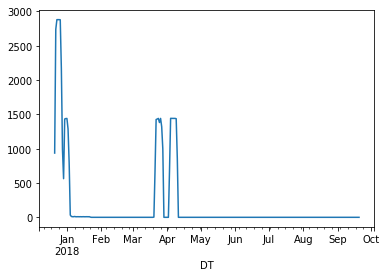

In [13]:
# Dead times
df_sensors_only.set_index("DT")['nullcount'].resample("1d").sum().sort_index().plot()

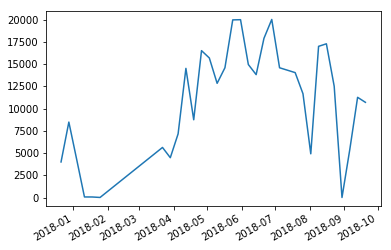

In [14]:
df_sensor_data.DT.drop_duplicates().dt.round('7d').value_counts().sort_index().plot()